# MBA em Ciência de Dados
CeMEAI - ICMC/USP São Carlos

### Técnicas Avançadas de Captura e Tratamento de Dados
#### <span style="color:darkred">Módulo III - Aquisição e Transformação de Dados</span>




##### Plantão 05/05/2021 - Jadson Oliveira
Exercícios Extras

---

In [214]:
# Carregando bibliotecas essenciais
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sn
import warnings

# Configura Seaborn
sn.set(style="whitegrid", palette="deep", color_codes=True)
# Ignora warnings
warnings.filterwarnings('ignore')

Utilizaremos um conjunto de dados extraídos a partir de um relatório que objetivou definir índices de felicidades
para cada país do mundo. O conjunto de dados a ser utilizado é uma fatia do conjunto original, contendo somente dados do ano de 2021.

O conjunto de dados "World Happiness Report" pode ser encontrado em: https://www.kaggle.com/ajaypalsinghlo/world-happiness-report-2021

Cada país tem um conjunto de variáveis que represetam fatores como: produção econômica, suporte social, expectativa de vida, liberdade, ausência de corrupção, e generosidade.

O conjuto de dados contém 149 instâncias e 20 colunas.

In [23]:
# carregando dados
data = pd.read_csv("./dados/world-happiness-report-2021.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 20 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Country name                                149 non-null    object 
 1   Regional indicator                          149 non-null    object 
 2   Ladder score                                149 non-null    float64
 3   Standard error of ladder score              149 non-null    float64
 4   upperwhisker                                149 non-null    float64
 5   lowerwhisker                                149 non-null    float64
 6   Logged GDP per capita                       149 non-null    float64
 7   Social support                              149 non-null    float64
 8   Healthy life expectancy                     149 non-null    float64
 9   Freedom to make life choices                149 non-null    float64
 10  Generosity    

De acordo com a fonte de dados, as colunas 12 até 19 (inclusives) foram dados gerados a partir dos outros atributos na tentativa de explicar o score de felicidade por cada um dos fatores originalmente extraídos.

Tendo isso em mente, e buscando simplificar o conjunto de dados para as consultas a serem revisadas e realizadas em sequência, vamos eliminar as colunas geradas, isto é das colunas 12 até a coluna 19, então vamos renomear as colunas utilizando a seguinte lista de nomes:
```python
["pais", "regiao", "pontuacao", "desvio_padrao", "pavio_alta", "pavio_baixa", "pib_per_capita", "suporte_social", "expectativa_vida", "liberdade_vida", "generosidade", "corrupcao"]
```

In [24]:
print("shape original: ", data.shape)

# Removendo colunas de 12 até 19
columns_to_remove = data.columns[12:].values
print("colunas a serem removidas: ", columns_to_remove)

data.drop(columns=columns_to_remove, inplace=True)

print("shape após deleção: ", data.shape)

shape original:  (149, 20)
colunas a serem removidas:  ['Ladder score in Dystopia' 'Explained by: Log GDP per capita'
 'Explained by: Social support' 'Explained by: Healthy life expectancy'
 'Explained by: Freedom to make life choices' 'Explained by: Generosity'
 'Explained by: Perceptions of corruption' 'Dystopia + residual']
shape após deleção:  (149, 12)


In [30]:
# Renomeando nome das colunas existentes

data.columns = ["pais", "regiao", "pontuacao", "desvio_padrao", "pavio_alta", "pavio_baixa",
                "pib_per_capita", "suporte_social", "expectativa_vida", "liberdade_vida",
                "generosidade", "corrupcao"]

# Exibindo alguns elementos do dataframe modificado
data.head(5)

pais          regiao  pontuacao  desvio_padrao  pavio_alta  \
0      Finland  Western Europe      7.842          0.032       7.904   
1      Denmark  Western Europe      7.620          0.035       7.687   
2  Switzerland  Western Europe      7.571          0.036       7.643   
3      Iceland  Western Europe      7.554          0.059       7.670   
4  Netherlands  Western Europe      7.464          0.027       7.518   

   pavio_baixa  pib_per_capita  suporte_social  expectativa_vida  \
0        7.780          10.775           0.954              72.0   
1        7.552          10.933           0.954              72.7   
2        7.500          11.117           0.942              74.4   
3        7.438          10.878           0.983              73.0   
4        7.410          10.932           0.942              72.4   

   liberdade_vida  generosidade  corrupcao  
0           0.949        -0.098      0.186  
1           0.946         0.030      0.179  
2           0.919         0.025      0.292  
3           0.955         0.160      0.673  
4           0.913         0.175      0.338

### Discretização

Valores contínuos podem representar um desafio na análise de dados

* alguns métodos não permitem o uso de valores contínuos, seja como atributo de entrada ou saída.

* assumir valor contínuo pode ser inviável devido à quantidade de dados disponíveis


**Discretizar** é criar um novo atributo discreto (com valores finitos e bem definidos) a partir de um atributo contínuo.

* podemos também re-aplicar discretização em dados já discretos, reduzindo a quantidade de valores possíveis

#### Exercício:
Analise o atributo `pontuacao` através de um gráfico "boxplot".

<AxesSubplot:>

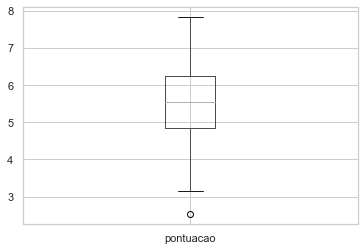

In [55]:
data.boxplot(['pontuacao'])

#### Exercício:
Analise o atributo `pontuacao` através de um histograma.

array([[<AxesSubplot:title={'center':'pontuacao'}>]], dtype=object)

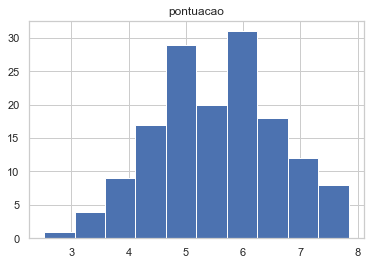

In [56]:
data.hist(['pontuacao'])

#### Exercício:
Quais os valores únicos da colunas `pontuacao`?

*PS.: Como estamos trabalhando com um dataset pequeno (149 instâncias) é fácil visualizar os números únicos de uma coluna composta por números reais,
mas para conjuntos gigantes isso pode ser um problema, por meio do histograma dá pra saber o intervalo dos valores que compõem o atributo.*

In [57]:
data['pontuacao'].unique()

array([7.842, 7.62 , 7.571, 7.554, 7.464, 7.392, 7.363, 7.324, 7.277,
       7.268, 7.183, 7.157, 7.155, 7.103, 7.085, 7.069, 7.064, 6.965,
       6.951, 6.834, 6.69 , 6.647, 6.602, 6.584, 6.561, 6.494, 6.491,
       6.483, 6.461, 6.435, 6.431, 6.377, 6.372, 6.331, 6.33 , 6.317,
       6.309, 6.255, 6.223, 6.189, 6.18 , 6.179, 6.172, 6.166, 6.152,
       6.14 , 6.106, 6.078, 6.061, 6.049, 6.032, 6.012, 5.992, 5.985,
       5.972, 5.94 , 5.929, 5.919, 5.882, 5.88 , 5.845, 5.84 , 5.813,
       5.766, 5.764, 5.744, 5.723, 5.716, 5.677, 5.653, 5.581, 5.545,
       5.536, 5.534, 5.477, 5.466, 5.411, 5.41 , 5.384, 5.345, 5.342,
       5.339, 5.306, 5.283, 5.269, 5.266, 5.198, 5.171, 5.142, 5.132,
       5.117, 5.101, 5.088, 5.074, 5.066, 5.051, 5.045, 5.03 , 5.025,
       4.984, 4.956, 4.948, 4.934, 4.918, 4.892, 4.891, 4.887, 4.875,
       4.854, 4.852, 4.834, 4.83 , 4.794, 4.759, 4.723, 4.721, 4.636,
       4.625, 4.607, 4.596, 4.584, 4.574, 4.517, 4.426, 4.395, 4.355,
       4.325, 4.308,

#### Exercício
Realize a discretização da coluna `pontuacao` utilizando intervalos fixos e frequência variáveis (utilize o método `.cut()`).

- Utilize a seguinte lista para criar os intervalos: [2, 4, 6, 8];
- Utilize a seguinte lista para dar labels aos intervalos: ['baixo', 'medio', 'alto'];
- Gere uma nova coluna, chamada "pontuacao_intervalos_fixos" para armazenar qual intervalo cada instância faz parte.

In [88]:
interval_pontuacao = np.arange(2, 10, 2)
labels_pontuacao = ['baixo', 'medio', 'alto']
print("Os intervalos definidos são: ", interval_pontuacao)

Os intervalos definidos são:  [2 4 6 8]


In [89]:
data['pontuacao_intervalos_fixos'] = pd.cut(data['pontuacao'], bins=interval_pontuacao, labels=labels_pontuacao)

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   pais                        149 non-null    object  
 1   regiao                      149 non-null    object  
 2   pontuacao                   149 non-null    float64 
 3   desvio_padrao               149 non-null    float64 
 4   pavio_alta                  149 non-null    float64 
 5   pavio_baixa                 149 non-null    float64 
 6   pib_per_capita              149 non-null    float64 
 7   suporte_social              149 non-null    float64 
 8   expectativa_vida            149 non-null    float64 
 9   liberdade_vida              149 non-null    float64 
 10  generosidade                149 non-null    float64 
 11  corrupcao                   149 non-null    float64 
 12  pontuacao_intervalos_fixos  149 non-null    category
dtypes: category(1), floa

In [90]:
data['pontuacao_intervalos_fixos'].value_counts()

medio    85
alto     52
baixo    12
Name: pontuacao_intervalos_fixos, dtype: int64

In [91]:
data.head(3)

pais          regiao  pontuacao  desvio_padrao  pavio_alta  \
0      Finland  Western Europe      7.842          0.032       7.904   
1      Denmark  Western Europe      7.620          0.035       7.687   
2  Switzerland  Western Europe      7.571          0.036       7.643   

   pavio_baixa  pib_per_capita  suporte_social  expectativa_vida  \
0        7.780          10.775           0.954              72.0   
1        7.552          10.933           0.954              72.7   
2        7.500          11.117           0.942              74.4   

   liberdade_vida  generosidade  corrupcao pontuacao_intervalos_fixos  
0           0.949        -0.098      0.186                       alto  
1           0.946         0.030      0.179                       alto  
2           0.919         0.025      0.292                       alto

<AxesSubplot:>

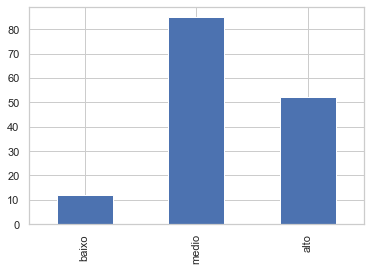

In [92]:
data['pontuacao_intervalos_fixos'].value_counts(sort=False).plot(kind='bar')

#### Exercício
Quais os países e suas respectivas regiões que estão no intervalo com pontuação considerada baixa?

In [94]:
data[['pais', 'regiao']][data['pontuacao_intervalos_fixos'] == 'baixo']

pais                        regiao
137  Sierra Leone            Sub-Saharan Africa
138         India                    South Asia
139       Burundi            Sub-Saharan Africa
140         Yemen  Middle East and North Africa
141      Tanzania            Sub-Saharan Africa
142         Haiti   Latin America and Caribbean
143        Malawi            Sub-Saharan Africa
144       Lesotho            Sub-Saharan Africa
145      Botswana            Sub-Saharan Africa
146        Rwanda            Sub-Saharan Africa
147      Zimbabwe            Sub-Saharan Africa
148   Afghanistan                    South Asia

In [101]:
data['regiao'][data['pontuacao_intervalos_fixos'] == 'baixo'].value_counts()

Sub-Saharan Africa              8
South Asia                      2
Middle East and North Africa    1
Latin America and Caribbean     1
Name: regiao, dtype: int64

#### Exercício
Quantos países por região estão no intervalo com pontuação considerada alta?

In [105]:
data['regiao'][data['pontuacao_intervalos_fixos'] == 'alto'].value_counts()

Western Europe                        18
Central and Eastern Europe            10
Latin America and Caribbean           10
Middle East and North Africa           5
North America and ANZ                  4
Commonwealth of Independent States     2
Sub-Saharan Africa                     1
East Asia                              1
Southeast Asia                         1
Name: regiao, dtype: int64

#### Exercício
Utilize o `KBinsDiscretizer` da biblioteca `scikit-learn` para discretizar os dados da coluna `pontuacao`

- Utilize a estratégia "kmeans";
- Discretize os dados em 3 bins;
- Crie uma nova coluna chamada "pontuacao_intervalos_kmeans" e salve os resultados.

In [113]:
# Importando KBinsDiscretizer
from sklearn.preprocessing import KBinsDiscretizer

In [114]:
kbd = KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='kmeans')
data['pontuacao_intervalos_kmeans'] = kbd.fit_transform(data[['pontuacao']])
print(data['pontuacao_intervalos_kmeans'].value_counts(sort=False))
print(kbd.bin_edges_)

0.0    31
2.0    55
1.0    63
Name: pontuacao_intervalos_kmeans, dtype: int64
[array([2.523     , 4.67262314, 5.9689469 , 7.842     ])]


In [119]:
data.head(3)

pais          regiao  pontuacao  desvio_padrao  pavio_alta  \
0      Finland  Western Europe      7.842          0.032       7.904   
1      Denmark  Western Europe      7.620          0.035       7.687   
2  Switzerland  Western Europe      7.571          0.036       7.643   

   pavio_baixa  pib_per_capita  suporte_social  expectativa_vida  \
0        7.780          10.775           0.954              72.0   
1        7.552          10.933           0.954              72.7   
2        7.500          11.117           0.942              74.4   

   liberdade_vida  generosidade  corrupcao pontuacao_intervalos_fixos  \
0           0.949        -0.098      0.186                       alto   
1           0.946         0.030      0.179                       alto   
2           0.919         0.025      0.292                       alto   

   pontuacao_intervalos_kmeans  
0                          2.0  
1                          2.0  
2                          2.0

#### Exercício
Novamente, quantos países por região estão no intervalo com pontuação considerada alta?

In [120]:
data['regiao'][data['pontuacao_intervalos_kmeans'] == 2.0].value_counts()

Western Europe                        18
Central and Eastern Europe            11
Latin America and Caribbean           11
Middle East and North Africa           5
North America and ANZ                  4
Commonwealth of Independent States     2
Southeast Asia                         2
Sub-Saharan Africa                     1
East Asia                              1
Name: regiao, dtype: int64

### Resumo dos discretizadores

<table align="center">
	<thead>
		<tr>
			<th>Função</th>
			<th>Observação</th>
		</tr>
    </thead>
    <tbody>
		<tr>
            <td><a href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.cut.html">cut (pandas)</a></td>
            <td>Cria intervalos de tamanhos iguais mas com frequencias de amostras desiguais em cada intervalo.</td>
        </tr>
		<tr>
            <td><a href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.qcut.html">qcut (pandas)</a></td>
            <td>Cria intervalos de tamanhos diferentes mas com frequencia de amostras iguais em cada intervalo.</td>
		</tr>
        <tr>
            <td><a href="https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.KBinsDiscretizer.html">KBinsDiscretizer (sklearn)</a></td>
            <td>Cria intervalos utilizando a estratégia especificada por parâmetro e permite fazer a transformação inversa.</td>
		</tr>
	</tbody>
</table>

## Normalização

- Variáveis possuem intervalos diferentes de valores possíveis devido a sua natureza;
- A princípio é positivo que tenhamos acesso ao valor real das variáveis, mas a depender do modelo que utilizamos, variáveis de maior magnitude dominam as estatísticas.
- Em uma tarefa de aprendizado de máquina, aplicar normalização somente no conjunto de **treinamento** e então utilizar os parâmetros aprendidos no conjunto de teste.

#### Exercício
Crie um gráfico de caixa (*boxplot*) para ilutrar a distribuição dos atributos: `pib_per_capita`, `expectativa_de_vida`, `generosidade`, `corrupcao`

<AxesSubplot:>

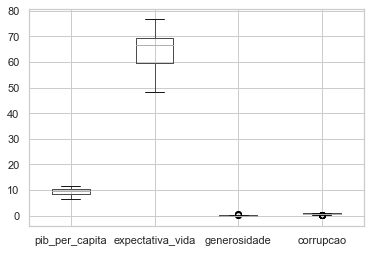

In [130]:
attributes =  ['pib_per_capita', 'expectativa_vida', 'generosidade', 'corrupcao']
data.boxplot(attributes)

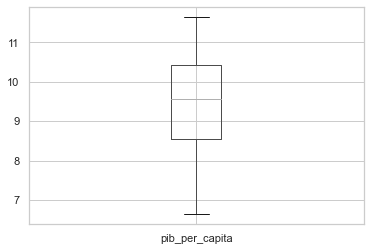

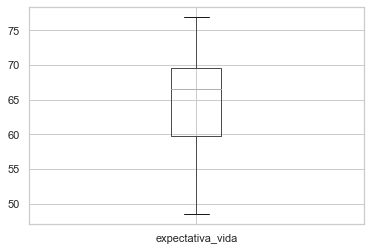

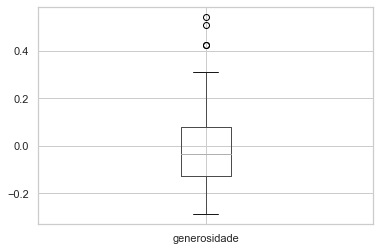

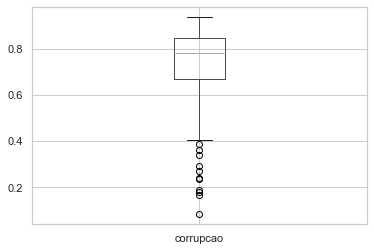

In [132]:
for item in attributes:
    data.boxplot(item)
    plt.show()

#### Exercício
Seguindo os atributos apresentados no exercício anterior, utilize o modelo NearestNeighbor do `scikit-learn` para encontrar o país mais próximo do "Brasil"

In [259]:
# Importa os pacotes necessários
from sklearn.neighbors import NearestNeighbors

In [285]:
neighbors = NearestNeighbors(n_neighbors=2)
neighbors.fit(data[['pib_per_capita', 'expectativa_vida', 'generosidade', 'corrupcao']])

NearestNeighbors(n_neighbors=2)

In [286]:
brazil_item = data[data.pais == 'Brazil']
brazil_item

pais                       regiao  pontuacao  desvio_padrao  pavio_alta  \
34  Brazil  Latin America and Caribbean       6.33          0.043       6.415   

    pavio_baixa  pib_per_capita  suporte_social  expectativa_vida  \
34        6.245           9.577           0.882            66.601   

    liberdade_vida  generosidade  corrupcao pontuacao_intervalos_fixos  \
34           0.804        -0.071      0.756                       alto   

    pontuacao_intervalos_kmeans  pontuacao_label  pontuacao_ordinal  
34                          2.0                0                0.0

In [287]:
neighbors.kneighbors(brazil_item[['pib_per_capita', 'expectativa_vida', 'generosidade', 'corrupcao']], 2, return_distance=False)

array([[ 34, 117]], dtype=int64)

In [288]:
data.iloc[[117]]

pais                        regiao  pontuacao  desvio_padrao  pavio_alta  \
117  Iran  Middle East and North Africa      4.721          0.055       4.828   

     pavio_baixa  pib_per_capita  suporte_social  expectativa_vida  \
117        4.614           9.584            0.71              66.3   

     liberdade_vida  generosidade  corrupcao pontuacao_intervalos_fixos  \
117           0.608         0.218      0.714                      medio   

     pontuacao_intervalos_kmeans  pontuacao_label  pontuacao_ordinal  
117                          1.0                2                2.0

#### Exercício
Crie um novo dataframe composto somente pelas seguintes colunas:
```python
['pais', 'pib_per_capita', 'expectativa_vida', 'generosidade', 'corrupcao']
```
Normalize todos os atributos anteriores utilizando a técnica "StandardScale"

In [136]:
new_data = data[['pais', 'pib_per_capita', 'expectativa_vida', 'generosidade', 'corrupcao']].copy()
display(new_data.info())
display(new_data.head(5))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   pais              149 non-null    object 
 1   pib_per_capita    149 non-null    float64
 2   expectativa_vida  149 non-null    float64
 3   generosidade      149 non-null    float64
 4   corrupcao         149 non-null    float64
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


None

pais  pib_per_capita  expectativa_vida  generosidade  corrupcao
0      Finland          10.775              72.0        -0.098      0.186
1      Denmark          10.933              72.7         0.030      0.179
2  Switzerland          11.117              74.4         0.025      0.292
3      Iceland          10.878              73.0         0.160      0.673
4  Netherlands          10.932              72.4         0.175      0.338

#### Exercício
Normalize todas as variáveis numéricas do novo dataframe, utilizando a estratégia "MinMaxScaler" da biblioteca `scikit-learn`

In [188]:
# Importa os pacotes úteis para realizar as normalizações
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [189]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_features = scaler.fit_transform(new_data[['pib_per_capita', 'expectativa_vida', 'generosidade', 'corrupcao']])

# atualizando feature do novo dataframe
new_data[['pib_per_capita', 'expectativa_vida', 'generosidade', 'corrupcao']] = scaled_features

In [190]:
new_data.head(5)

pais  pib_per_capita  expectativa_vida  generosidade  corrupcao
0      Finland        0.826018          0.826058      0.228916   0.121354
1      Denmark        0.857542          0.850641      0.383133   0.113186
2  Switzerland        0.894254          0.910342      0.377108   0.245041
3      Iceland        0.846568          0.861176      0.539759   0.689615
4  Netherlands        0.857342          0.840105      0.557831   0.298716

#### Exercício
Plot os gráficos de caixa (*boxplot*) para as variáveis alteradas do dataframe normalizado

<AxesSubplot:>

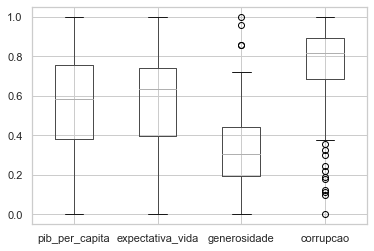

In [191]:
attributes =  ['pib_per_capita', 'expectativa_vida', 'generosidade', 'corrupcao']
new_data.boxplot(attributes)

#### Exercício
Plot um histograma para o antes e depois de cada uma das variáveis transformadas

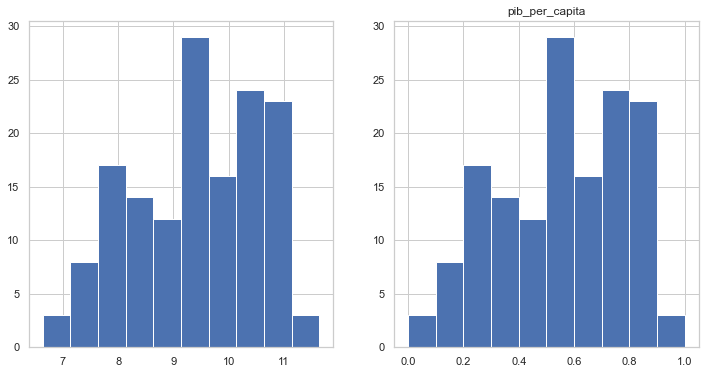

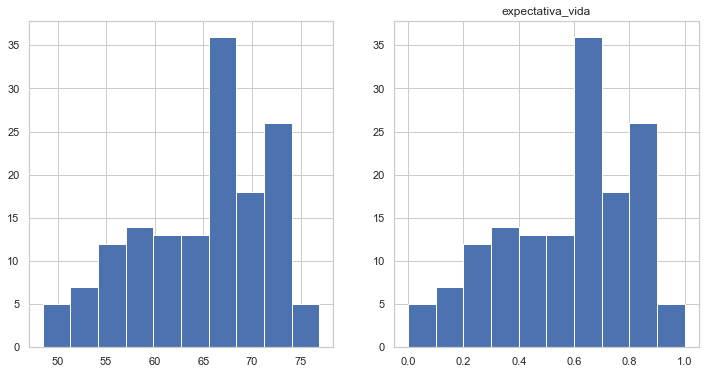

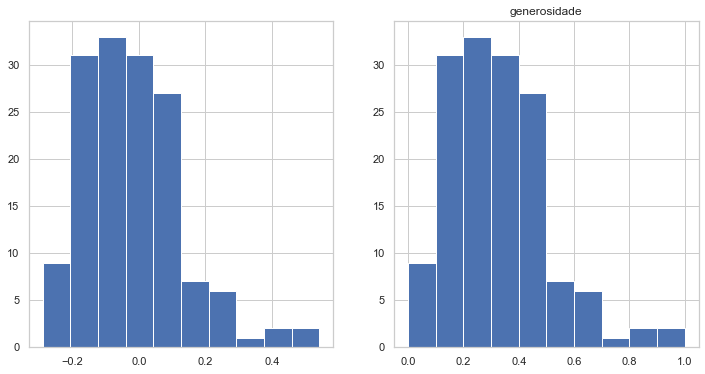

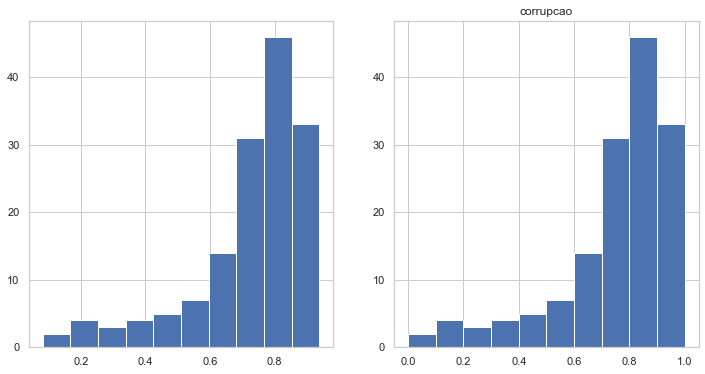

In [192]:
for item in attributes:
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,6))
    data[item].hist(ax=axes[0])
    new_data[item].hist(ax=axes[1])
    plt.title(item)

#### Exercício
Realize os plots anteriores novamente, mas dessa vez utilizando o StandardScaler

#### Exercício
Seguindo os atributos apresentados no exercício anterior, utilize o modelo NearestNeighbor do `scikit-learn` para encontrar o país mais próximo do "Brasil"

In [290]:
neighbors = NearestNeighbors(n_neighbors=2)
neighbors.fit(new_data[['pib_per_capita', 'expectativa_vida', 'generosidade', 'corrupcao']])

NearestNeighbors(n_neighbors=2)

In [291]:
brazil_item = new_data[data.pais == 'Brazil']
brazil_item

pais  pib_per_capita  expectativa_vida  generosidade  corrupcao
34  Brazil        0.586991          0.636453      0.261446   0.786464

In [292]:
neighbors.kneighbors(brazil_item[['pib_per_capita', 'expectativa_vida', 'generosidade', 'corrupcao']], 2, return_distance=False)

array([[ 34, 108]], dtype=int64)

In [298]:
display(data.iloc[[ 34, 108]][['pais', 'pontuacao', 'pib_per_capita', 'expectativa_vida', 'generosidade', 'corrupcao']])

pais  pontuacao  pib_per_capita  expectativa_vida  generosidade  \
34    Brazil      6.330           9.577            66.601        -0.071   
108  Algeria      4.887           9.342            66.005        -0.067   

     corrupcao  
34       0.756  
108      0.752

Normalizadores do S

<table align="center">
	<thead>
		<tr>
			<th>Tipo</th>
			<th>Intervalo</th>
			<th>Média</th>
			<th>Desv. Padrão</th>
			<th>Observação</th>
		</tr>
    </thead>
    <tbody>
		<tr>
			<td>MinMaxScaler </td>
			<td>$[a,b]$*</td>
			<td>Varia</td>
			<td>Varia</td>
            <td>Restringe o intervalo e mantem a distribuição dos dados. É sensivel à outliers.</td>
		</tr>
		<tr>
			<td>StandardScaler</td>
			<td>Varia</td>
			<td>$0$</td>
			<td>$1$</td>
			<td>Não restringe o intervalo e transforma para a Distribuição Normal Padrão. É sensivel à outliers.</td>
		</tr>
		<tr>
			<td>RobustScaler</td>
			<td>Varia</td>
			<td>$0$*</td>
			<td>$1$*</td>
			<td>Não restringe o intervalo e transforma para média zero. É tolerante à outliers.</td>
		</tr>
		<tr>
			<td>Normalizer</td>
			<td>Varia</td>
			<td>Varia</td>
			<td>Varia</td>
			<td>Transforma a norma para $1$ para cada exemplo* e não para cada coluna.</td>
		</tr>
	</tbody>
</table>

* consultar [documentação oficial](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.preprocessing)

<table align="center">
	<thead>
		<tr>
			<th>Tipo</th>
			<th>Quando usar?</th>
		</tr>
    </thead>
    <tbody>
		<tr>
			<td>MinMaxScaler </td>
			<td>Quando os limites (sup. e inf.) dos dados são conhecidos</td>
        </tr>
		<tr>
			<td>StandardScaler</td>
			<td>Quando é necessário transformar o atributo em uma distribuição normal padrão<br>(assumindo que os dados já seguem um distribuição normal), podendo distorcer a distancia relativa entre os dados.<br>Além disso, alguns algoritmos esperam que essa transformação seja feita previamente.</td>
		</tr>
		<tr>
			<td>RobustScaler</td>
			<td>Similar ao StandardScaler, mas usado quando queremos que os outliers não tenham muita influência</td>
		</tr>
		<tr>
			<td>Normalizer</td>
			<td>1. Quando queremos simplificar calculos (e.g. distancia coseno, projeções, angulos)<br>2. Quando queremos oferecer estabilidade númerica (e.g. gradient descent, expectation maximization, regularization)<br>3. Quando queremos intepretar vetor como distribuição de probabilidades</td>
		</tr>
	</tbody>
</table>

### Resumo:

* Normalizar pode ser fundamental para obter modelos que consideram todos os atributos de forma equilibrada

* O método deve considerar as características dos dados

* Apenas o conjunto de *treinamento* deve ser usado para computar os parâmetros da normalização

## Transformação

#### Distribuições de variáveis

Variáveis possuem distribuições diferentes de valores possíveis devido a sua natureza.

O senso comum vai assumir que temos uma das distribuições abaixo:

* uniforme

* normal

... e que correlações são sempre:

* lineares

Mas isso nem sempre acontece!

Pode ser útil transformar as variáveis para permitir melhor analisar os dados, inclusive suas correlações em particular com dados de natureza **exponencial**


### Assimetria (obliquidade ou *skewness*)

Intervalos de assimetria são simplificações quem podem facilitar o entendimento com relação à normalidade dos dados

- $0$: Normalmente distribuida (ou perfeitamente simétrica)
- $> 0$: Maior concentração na cauda esquerda da distribuição (Negativa)
- $< 0$: Maior concentração na cauda direita da distribuição (Positiva)

<table>
    <thead>
        <tr>
            <th width="200px">Intervalos</th>
            <th>Descrição</th>
        </tr>
    </thead>
    <tbody>
        <tr>
            <td>$[-0.5, 0.5]$</td>
            <td>Aproximadamente simétrica</td>
        </tr>
        <tr>
            <td>$[-1.0,-0.5]$ ou $[0.5,1.0]$</td>
            <td>Moderadamente assimétrica</td>
        </tr>
        <tr>
            <td>$[-∞,-1.0]$ ou $[1.0,∞]$</td>
            <td>Altamente assimétrica</td>
        </tr>
    </tbody>
</table>

#### Exercício
Plot os histogramas de todas as colunas do tipo float

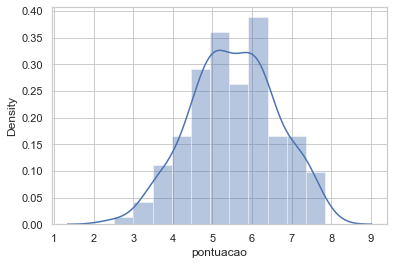

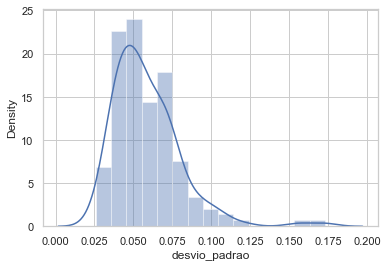

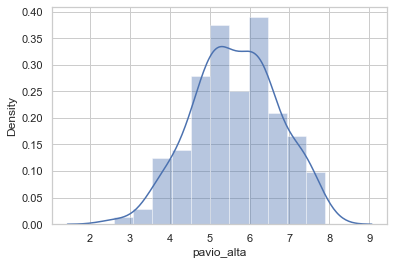

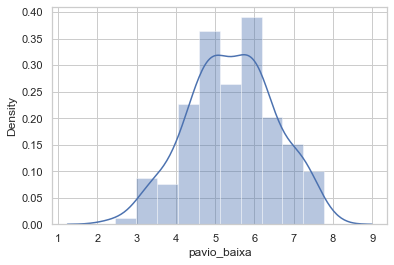

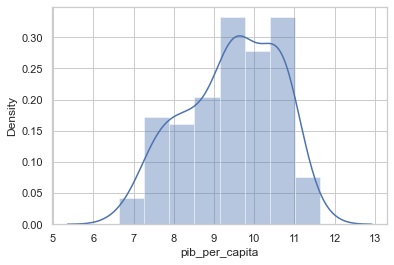

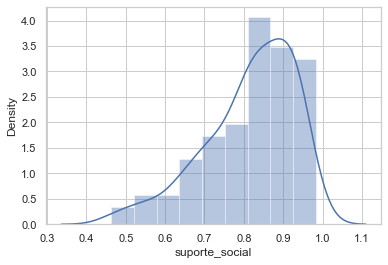

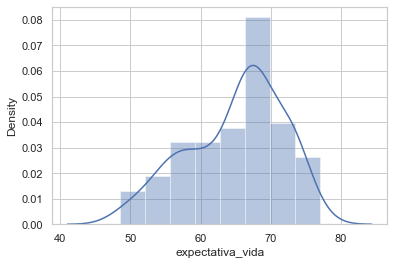

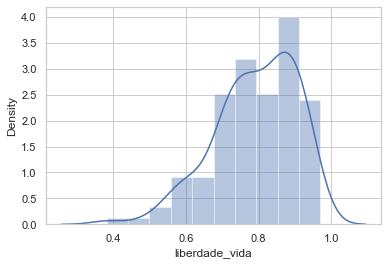

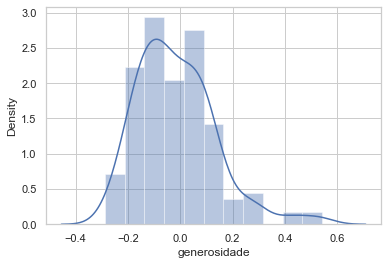

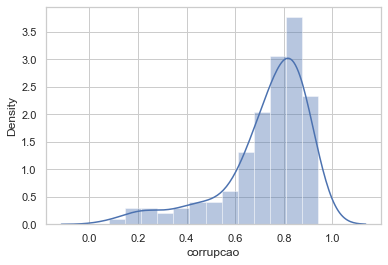

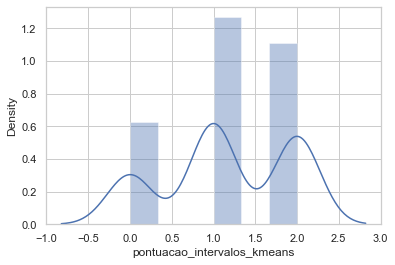

In [215]:
for item in data.columns:
    if data[item].dtype == float:
        sn.distplot(data[item])
        plt.show()

#### Transformações
<table>
    <thead>
        <tr>
            <th width="100px">Nível</th>
            <th width="150px">Assimetria Positiva</th>
            <th width="200px">Assimetria Negativa</th>
        </tr>
    </thead>
    <tbody>
        <tr>
            <td>Baixa</td>
            <td>$\sqrt{x + c}$</td>
            <td>$\sqrt{\max(x+c) - x}$</td>
        </tr>
        <tr>
            <td>Moderada</td>
            <td>$log_{10}~x + c$</td>
            <td>$log_{10}~{\max(x+c) - x}$</td>
        </tr>
        <tr>
            <td>Alta</td>
            <td>$\frac{1}{x + c}$</td>
            <td>$\frac{1}{\max(x+c) - x}$</td>
        </tr>
    </tbody>
</table>

### Resumo:

* Encontrar transformações nos atributos permite novas interpretações, para além do que temos como intuição 

* Transformações não excluem a limpeza e tratamento de dados 

* Transformações podem funcionar como geradores de novos atributos

* A assimetria pode ser usada para estudar as distribuições, e planejadas transformações para obter dados mais próximos de distribuições normais

## Variáveis categóricas

- Variáveis categóricas, geralmente expressas por meio de texto, não são utilizáveis diretamente por parte dos modelos estatísticos e computacionais.

- Obter codificações numéricas dessas variáveis se torna importante para permitir análise por um número mais amplo de ferramentas


---

### Na prática: métodos *pandas* vs *sklearn*

<table align="center">
	<thead>
		<tr>
            <th>Tipo</th>
			<th>Função</th>
			<th width="400px">Descrição</th>
		</tr>
    </thead>
    <tbody>
		<tr>
            <td>Nominal</td>
            <td><a href="https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html">OneHotEncoder</a> (sklearn)</td>
            <td>O método <i>aprende</i> as categorias a partir do conjunto. Fornece parametros para tratar com categorias desconhecidas e permite transformação inversa.</td>
        </tr>
        <tr>
            <td>Nominal</td>
            <td><a href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html">get_dummies</a> (pandas)</td>
            <td>O método não <i>aprende</i> as categorias do conjunto. Pode gerar inconsistencias caso exista categorias desconhecidas e não permite fazer transformação inversa de forma trivial.</td>
		</tr>
        <tr>
            <td>Ordinal</td>
            <td><a href="https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OrdinalEncoder.html">OrdinalEncoder</a> (sklearn)</td>
            <td>Permite identificar ordem das categorias automáticamente e fornece parametros para especificar a ordem das categorias, permite transformação inversa.</td>
		</tr>
        <tr>
            <td>Ordinal</td>
            <td><a href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.map.html">map</a> (pandas)</td>
            <td>Permite especificar a ordem das categorias, mas não permite fazer a transformação inversa de forma trivial.</td>
		</tr>
        <tr>
            <td>Rótulo</td>
            <td><a href="https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html">LabelEncoder</a> (sklearn)</td>
            <td>Usado somente para codificar <i>rótulos do alvo</i> no aprendizado supervisionado para converter um problema de classificação em regressão ou reduzir consumo de memoria caso a variável resposta seja grande (tamanho ou frequencia).</td>
		</tr>
	</tbody>
</table>

In [218]:
data.head()

pais          regiao  pontuacao  desvio_padrao  pavio_alta  \
0      Finland  Western Europe      7.842          0.032       7.904   
1      Denmark  Western Europe      7.620          0.035       7.687   
2  Switzerland  Western Europe      7.571          0.036       7.643   
3      Iceland  Western Europe      7.554          0.059       7.670   
4  Netherlands  Western Europe      7.464          0.027       7.518   

   pavio_baixa  pib_per_capita  suporte_social  expectativa_vida  \
0        7.780          10.775           0.954              72.0   
1        7.552          10.933           0.954              72.7   
2        7.500          11.117           0.942              74.4   
3        7.438          10.878           0.983              73.0   
4        7.410          10.932           0.942              72.4   

   liberdade_vida  generosidade  corrupcao pontuacao_intervalos_fixos  \
0           0.949        -0.098      0.186                       alto   
1           0.946         0.030      0.179                       alto   
2           0.919         0.025      0.292                       alto   
3           0.955         0.160      0.673                       alto   
4           0.913         0.175      0.338                       alto   

   pontuacao_intervalos_kmeans  
0                          2.0  
1                          2.0  
2                          2.0  
3                          2.0  
4                          2.0

#### Exercício
Utilize o método "LabelEncoder" na coluna "pontuacao_intervalos_fixos" e crie uma nova coluna com os resultados, chamada "pontuacao_label"

In [222]:
# Importa os pacotes necessários
from sklearn.preprocessing import LabelEncoder

In [223]:
encoder = LabelEncoder()

In [225]:
data['pontuacao_label'] = encoder.fit_transform(data['pontuacao_intervalos_fixos'])

In [229]:
data.sample(10)

pais                        regiao  pontuacao  \
50                     Latvia    Central and Eastern Europe      6.032   
62                       Peru   Latin America and Caribbean      5.840   
126                    Jordan  Middle East and North Africa      4.395   
110                      Iraq  Middle East and North Africa      4.854   
23   Taiwan Province of China                     East Asia      6.584   
13                     Canada         North America and ANZ      7.103   
55                      Japan                     East Asia      5.940   
140                     Yemen  Middle East and North Africa      3.658   
123                   Namibia            Sub-Saharan Africa      4.574   
108                   Algeria  Middle East and North Africa      4.887   

     desvio_padrao  pavio_alta  pavio_baixa  pib_per_capita  suporte_social  \
50           0.036       6.103        5.961          10.315           0.927   
62           0.075       5.988        5.692           9.458           0.832   
126          0.062       4.516        4.273           9.182           0.767   
110          0.059       4.970        4.738           9.240           0.746   
23           0.038       6.659        6.510          10.871           0.898   
13           0.042       7.185        7.021          10.776           0.926   
55           0.040       6.020        5.861          10.611           0.884   
140          0.070       3.794        3.521           7.578           0.832   
123          0.064       4.700        4.448           9.161           0.818   
108          0.053       4.991        4.783           9.342           0.802   

     expectativa_vida  liberdade_vida  generosidade  corrupcao  \
50             67.100           0.715        -0.162      0.800   
62             68.250           0.822        -0.154      0.891   
126            67.000           0.755        -0.167      0.705   
110            60.583           0.630        -0.053      0.875   
23             69.600           0.784        -0.070      0.721   
13             73.800           0.915         0.089      0.415   
55             75.100           0.796        -0.258      0.638   
140            57.122           0.602        -0.147      0.800   
123            56.799           0.719        -0.149      0.847   
108            66.005           0.480        -0.067      0.752   

    pontuacao_intervalos_fixos  pontuacao_intervalos_kmeans  pontuacao_label  
50                        alto                          2.0                0  
62                       medio                          1.0                2  
126                      medio                          0.0                2  
110                      medio                          1.0                2  
23                        alto                          2.0                0  
13                        alto                          2.0                0  
55                       medio                          1.0                2  
140                      baixo                          0.0                1  
123                      medio                          0.0                2  
108                      medio                          1.0                2

#### Exercício
Utilize o método "OrdinalEncoder" na coluna "pontuacao_intervalos_fixos" e crie uma nova coluna com os resultados, chamada "pontuacao_ordinal"

In [253]:
# Importa os pacotes necessários
from sklearn.preprocessing import OrdinalEncoder

In [254]:
ordinal_encoder = OrdinalEncoder()

In [255]:
data['pontuacao_ordinal'] = ordinal_encoder.fit_transform(data[['pontuacao_intervalos_fixos']])

In [256]:
data.sample(10)

pais                              regiao  pontuacao  \
43         Poland          Central and Eastern Europe      6.166   
100    Bangladesh                          South Asia      5.025   
8     New Zealand               North America and ANZ      7.277   
73   North Cyprus                      Western Europe      5.536   
74        Belarus  Commonwealth of Independent States      5.534   
42          Chile         Latin America and Caribbean      6.172   
98          Benin                  Sub-Saharan Africa      5.045   
49      Mauritius                  Sub-Saharan Africa      6.049   
53       Thailand                      Southeast Asia      5.985   
89     Azerbaijan  Commonwealth of Independent States      5.171   

     desvio_padrao  pavio_alta  pavio_baixa  pib_per_capita  suporte_social  \
43           0.040       6.245        6.087          10.382           0.898   
100          0.046       5.115        4.934           8.454           0.693   
8            0.040       7.355        7.198          10.643           0.948   
73           0.051       5.636        5.435          10.576           0.820   
74           0.047       5.625        5.442           9.853           0.910   
42           0.046       6.262        6.081          10.071           0.882   
98           0.073       5.189        4.901           8.087           0.489   
49           0.059       6.165        5.933          10.008           0.905   
53           0.047       6.077        5.893           9.805           0.888   
89           0.040       5.250        5.091           9.569           0.836   

     expectativa_vida  liberdade_vida  generosidade  corrupcao  \
43             69.702           0.841        -0.165      0.735   
100            64.800           0.877        -0.041      0.682   
8              73.400           0.929         0.134      0.242   
73             73.898           0.795         0.012      0.626   
74             66.253           0.650        -0.180      0.627   
42             70.000           0.742        -0.044      0.830   
98             54.713           0.757        -0.034      0.661   
49             66.701           0.867        -0.054      0.789   
53             67.401           0.884         0.287      0.895   
89             65.656           0.814        -0.223      0.506   

    pontuacao_intervalos_fixos  pontuacao_intervalos_kmeans  pontuacao_label  \
43                        alto                          2.0                0   
100                      medio                          1.0                2   
8                         alto                          2.0                0   
73                       medio                          1.0                2   
74                       medio                          1.0                2   
42                        alto                          2.0                0   
98                       medio                          1.0                2   
49                        alto                          2.0                0   
53                       medio                          2.0                2   
89                       medio                          1.0                2   

     pontuacao_ordinal  
43                 0.0  
100                2.0  
8                  0.0  
73                 2.0  
74                 2.0  
42                 0.0  
98                 2.0  
49                 0.0  
53                 2.0  
89                 2.0